## Setting Up the Code

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)
plane_crash = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv')

In [2]:
plane_crash.shape

(5268, 13)

In [3]:
plane_crash.head(23)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...
5,03/05/1915,01:00,"Tienen, Belgium",Military - German Navy,NaN,NaN,Zeppelin L-8 (airship),NaN,NaN,41.0,21.0,0.0,Crashed into trees while attempting to land af...
6,09/03/1915,15:20,"Off Cuxhaven, Germany",Military - German Navy,NaN,NaN,Zeppelin L-10 (airship),NaN,NaN,19.0,19.0,0.0,"Exploded and burned near Neuwerk Island, when..."
7,07/28/1916,NaN,"Near Jambol, Bulgeria",Military - German Army,NaN,NaN,Schutte-Lanz S-L-10 (airship),NaN,NaN,20.0,20.0,0.0,"Crashed near the Black Sea, cause unknown."
8,09/24/1916,01:00,"Billericay, England",Military - German Navy,NaN,NaN,Zeppelin L-32 (airship),NaN,NaN,22.0,22.0,0.0,Shot down by British aircraft crashing in flames.
9,10/01/1916,23:45,"Potters Bar, England",Military - German Navy,NaN,NaN,Zeppelin L-31 (airship),NaN,NaN,19.0,19.0,0.0,Shot down in flames by the British 39th Home D...


In [4]:
plane_crash.describe()

,Aboard,Fatalities,Ground
count,5246.000000,5256.000000,5246.000000
mean,27.554518,20.068303,1.608845
std,43.076711,33.199952,53.987827
min,0.000000,0.000000,0.000000
25%,5.000000,3.000000,0.000000
50%,13.000000,9.000000,0.000000
75%,30.000000,23.000000,0.000000
max,644.000000,583.000000,2750.000000


## Pick One Variable and Plot it in Four Different Ways

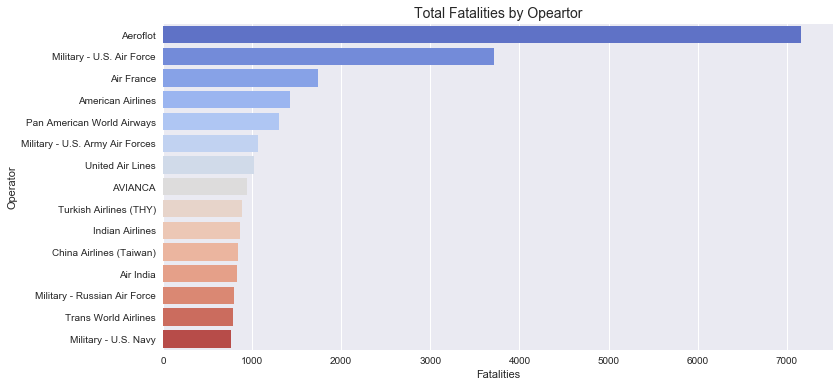

In [5]:
#Horizontal Bar plot
Fat_by_Op=plane_crash.groupby('Operator')[['Fatalities']].sum()
Fat_by_Op=Fat_by_Op.rename(columns={"Operator": "Fatalities"})
Fat_by_Op=Fat_by_Op.sort_values(by='Fatalities', ascending=False)
Fat_by_OpTOP=Fat_by_Op.head(15)

plt.figure(figsize=(12,6))
sns.barplot(y=Fat_by_OpTOP.index, x="Fatalities", data=Fat_by_OpTOP, palette="coolwarm", orient='h')
plt.xlabel('Fatalities', fontsize=11)
plt.ylabel('Operator', fontsize=11)
plt.title('Total Fatalities by Opeartor', loc='Center', fontsize=14)
plt.show()

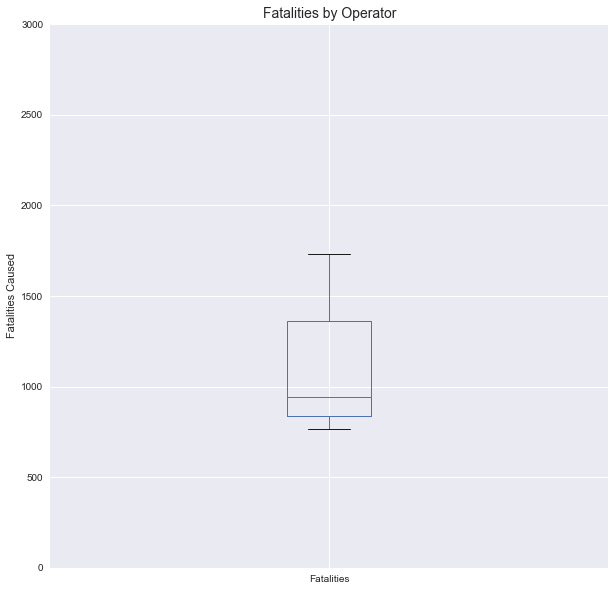

In [6]:
#boxplot
plt.figure(figsize=(10, 10))
plt.ylim([0,3000])
Fat_by_OpTOP.boxplot(column='Fatalities')
plt.ylabel('Fatalities Caused')
plt.title('Fatalities by Operator', fontsize=14)
plt.show()

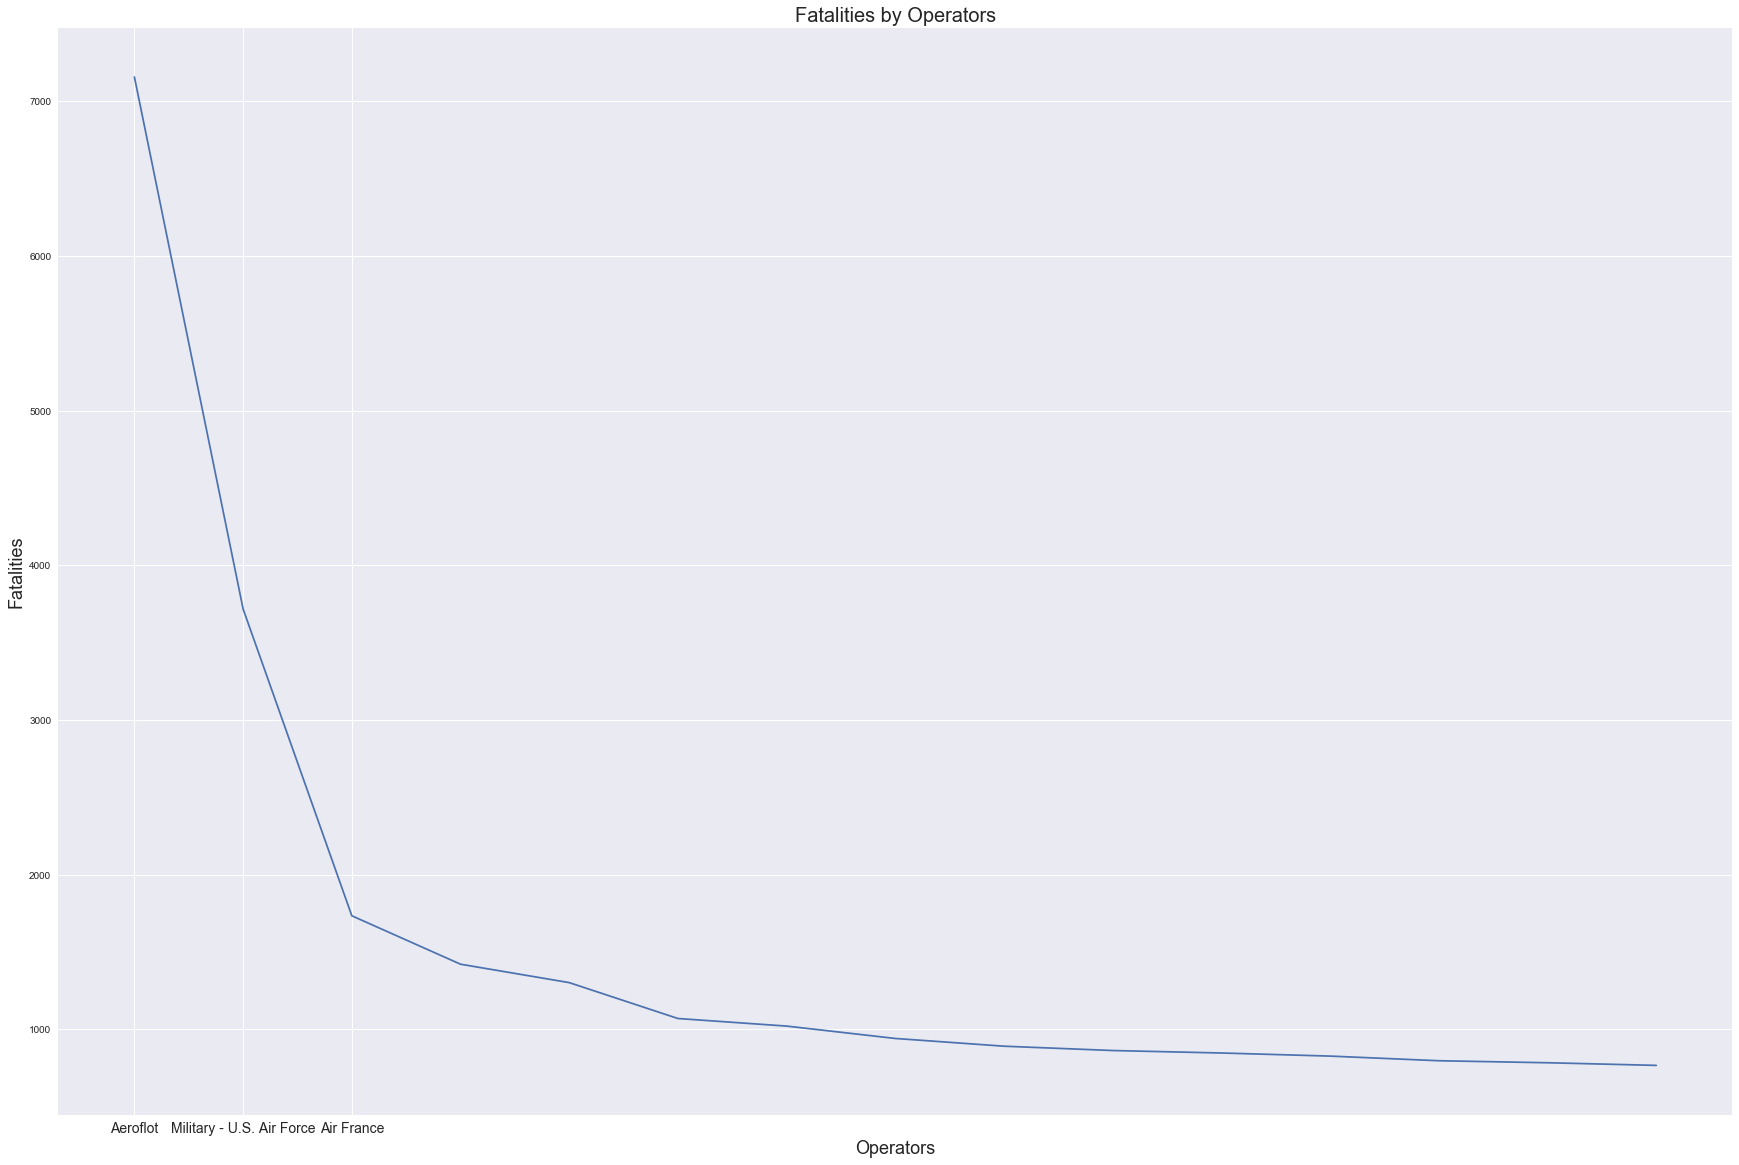

In [7]:
#line plot for the three operators with the largest fatalities
plt.figure(figsize=(30,20))
plt.plot(Fat_by_OpTOP)
plt.xlabel('Operators', fontsize=18)
plt.ylabel('Fatalities', fontsize=18)
plt.title('Fatalities by Operators', fontsize=20)
tick_val=[0,1,2]
tick_lab=['Aeroflot','Military - U.S. Air Force','Air France']
plt.xticks(tick_val, tick_lab, fontsize=14)
plt.show()

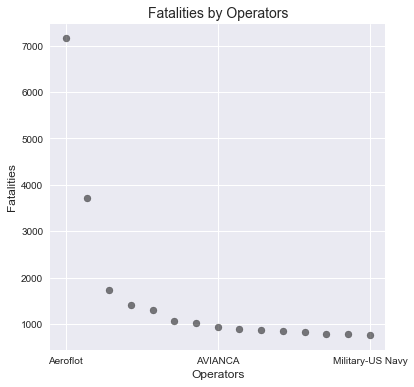

In [8]:
#scatterplot
x=Fat_by_OpTOP.index
y=Fat_by_OpTOP.Fatalities
plt.figure(figsize=(6,6))
plt.scatter(x,y,c='black',alpha=0.5)
tick_val=[0,7,14]
tick_lab=['Aeroflot','AVIANCA','Military-US Navy']
plt.xticks(tick_val, tick_lab)
plt.xlabel('Operators', fontsize=12)
plt.ylabel('Fatalities', fontsize=12)
plt.title('Fatalities by Operators', fontsize=14)
plt.show()

## Choose two continuous variables, and plot them three different ways

In [9]:
print(plane_crash['Date'].dtype)

object


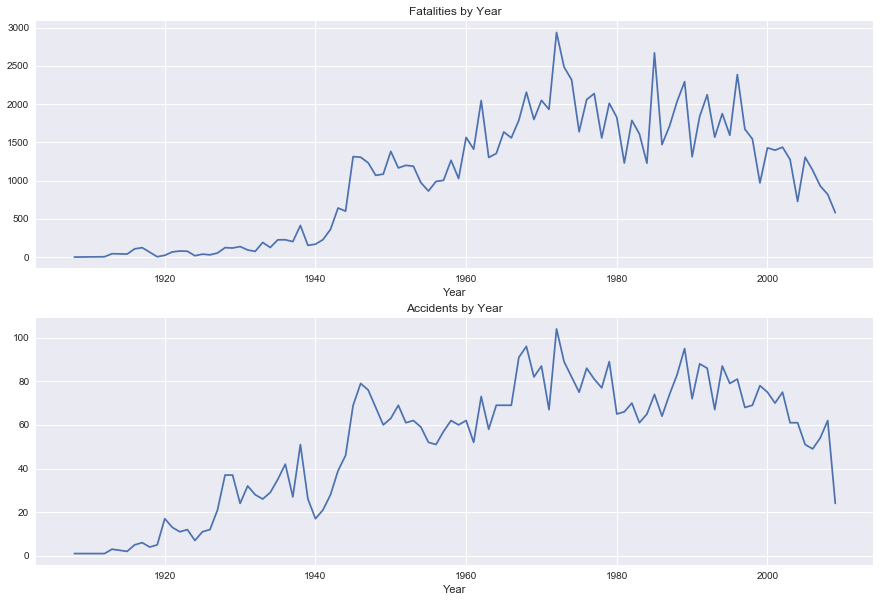

In [10]:
#line plot
plane_crash['Year']=plane_crash['Date'].apply(lambda x: int(str(x)[-4:]))
yearly=plane_crash[['Year','Fatalities']].groupby('Year').agg(['sum','count'])

fig_yearly,(axy1,axy2)=plt.subplots(2,1,figsize=(15,10))

yearly['Fatalities','sum'].plot(kind='line',title='Fatalities by Year',grid=True,ax=axy1)
yearly['Fatalities','count'].plot(kind='line',title='Accidents by Year',grid=True,ax=axy2)
plt.show()

/Users/samuelkim/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Plane Crash Fatalities Distributed')

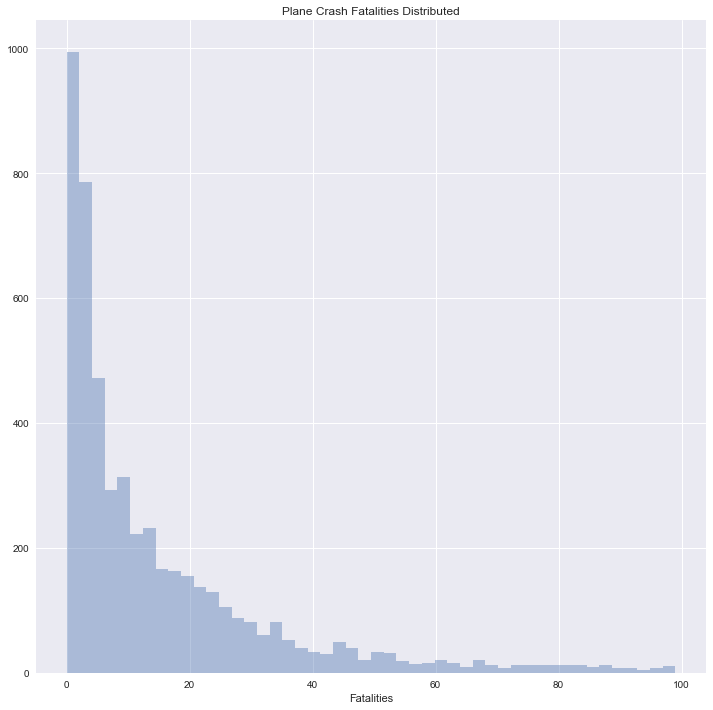

In [11]:
#distplot
x = plane_crash["Fatalities"]
x = x[x.notnull()]
plt.figure(figsize=(12,12))
sns.distplot(x[x <100], kde=False).set_title("Plane Crash Fatalities Distributed")

/Users/samuelkim/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/samuelkim/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


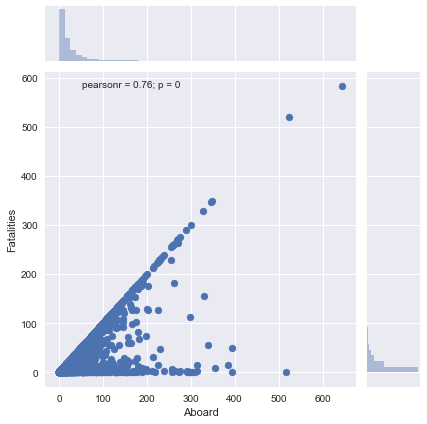

In [12]:
#jointplot
g = sns.jointplot("Aboard", "Fatalities", data=plane_crash)

## Choose one continuous variable and one categorical variable, and plot them six different ways.

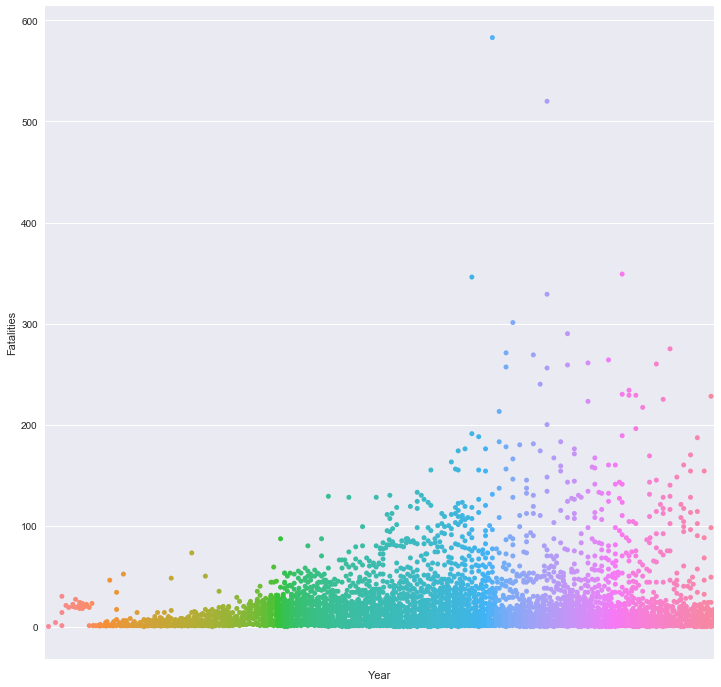

In [19]:
#swarmplot
plt.figure(figsize=(12, 12))
sns.swarmplot(x="Year", y="Fatalities", data=plane_crash)
frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])
plt.show()

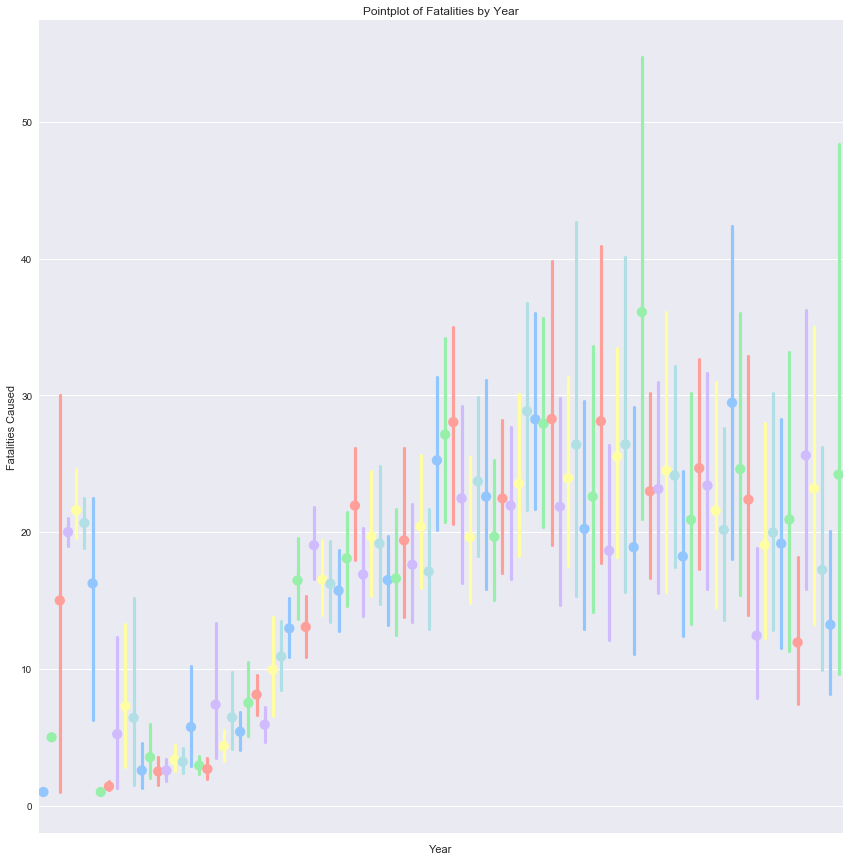

In [14]:
#pointplot
Frame=sns.factorplot(x='Year',y='Fatalities',data=plane_crash,size=12,kind="point",palette="pastel",ci=95)
Frame.despine(left=True)
Frame.set_ylabels("Fatalities Caused")
Frame.set_xlabels("Year")
plt.title('Pointplot of Fatalities by Year')
frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])
plt.show()

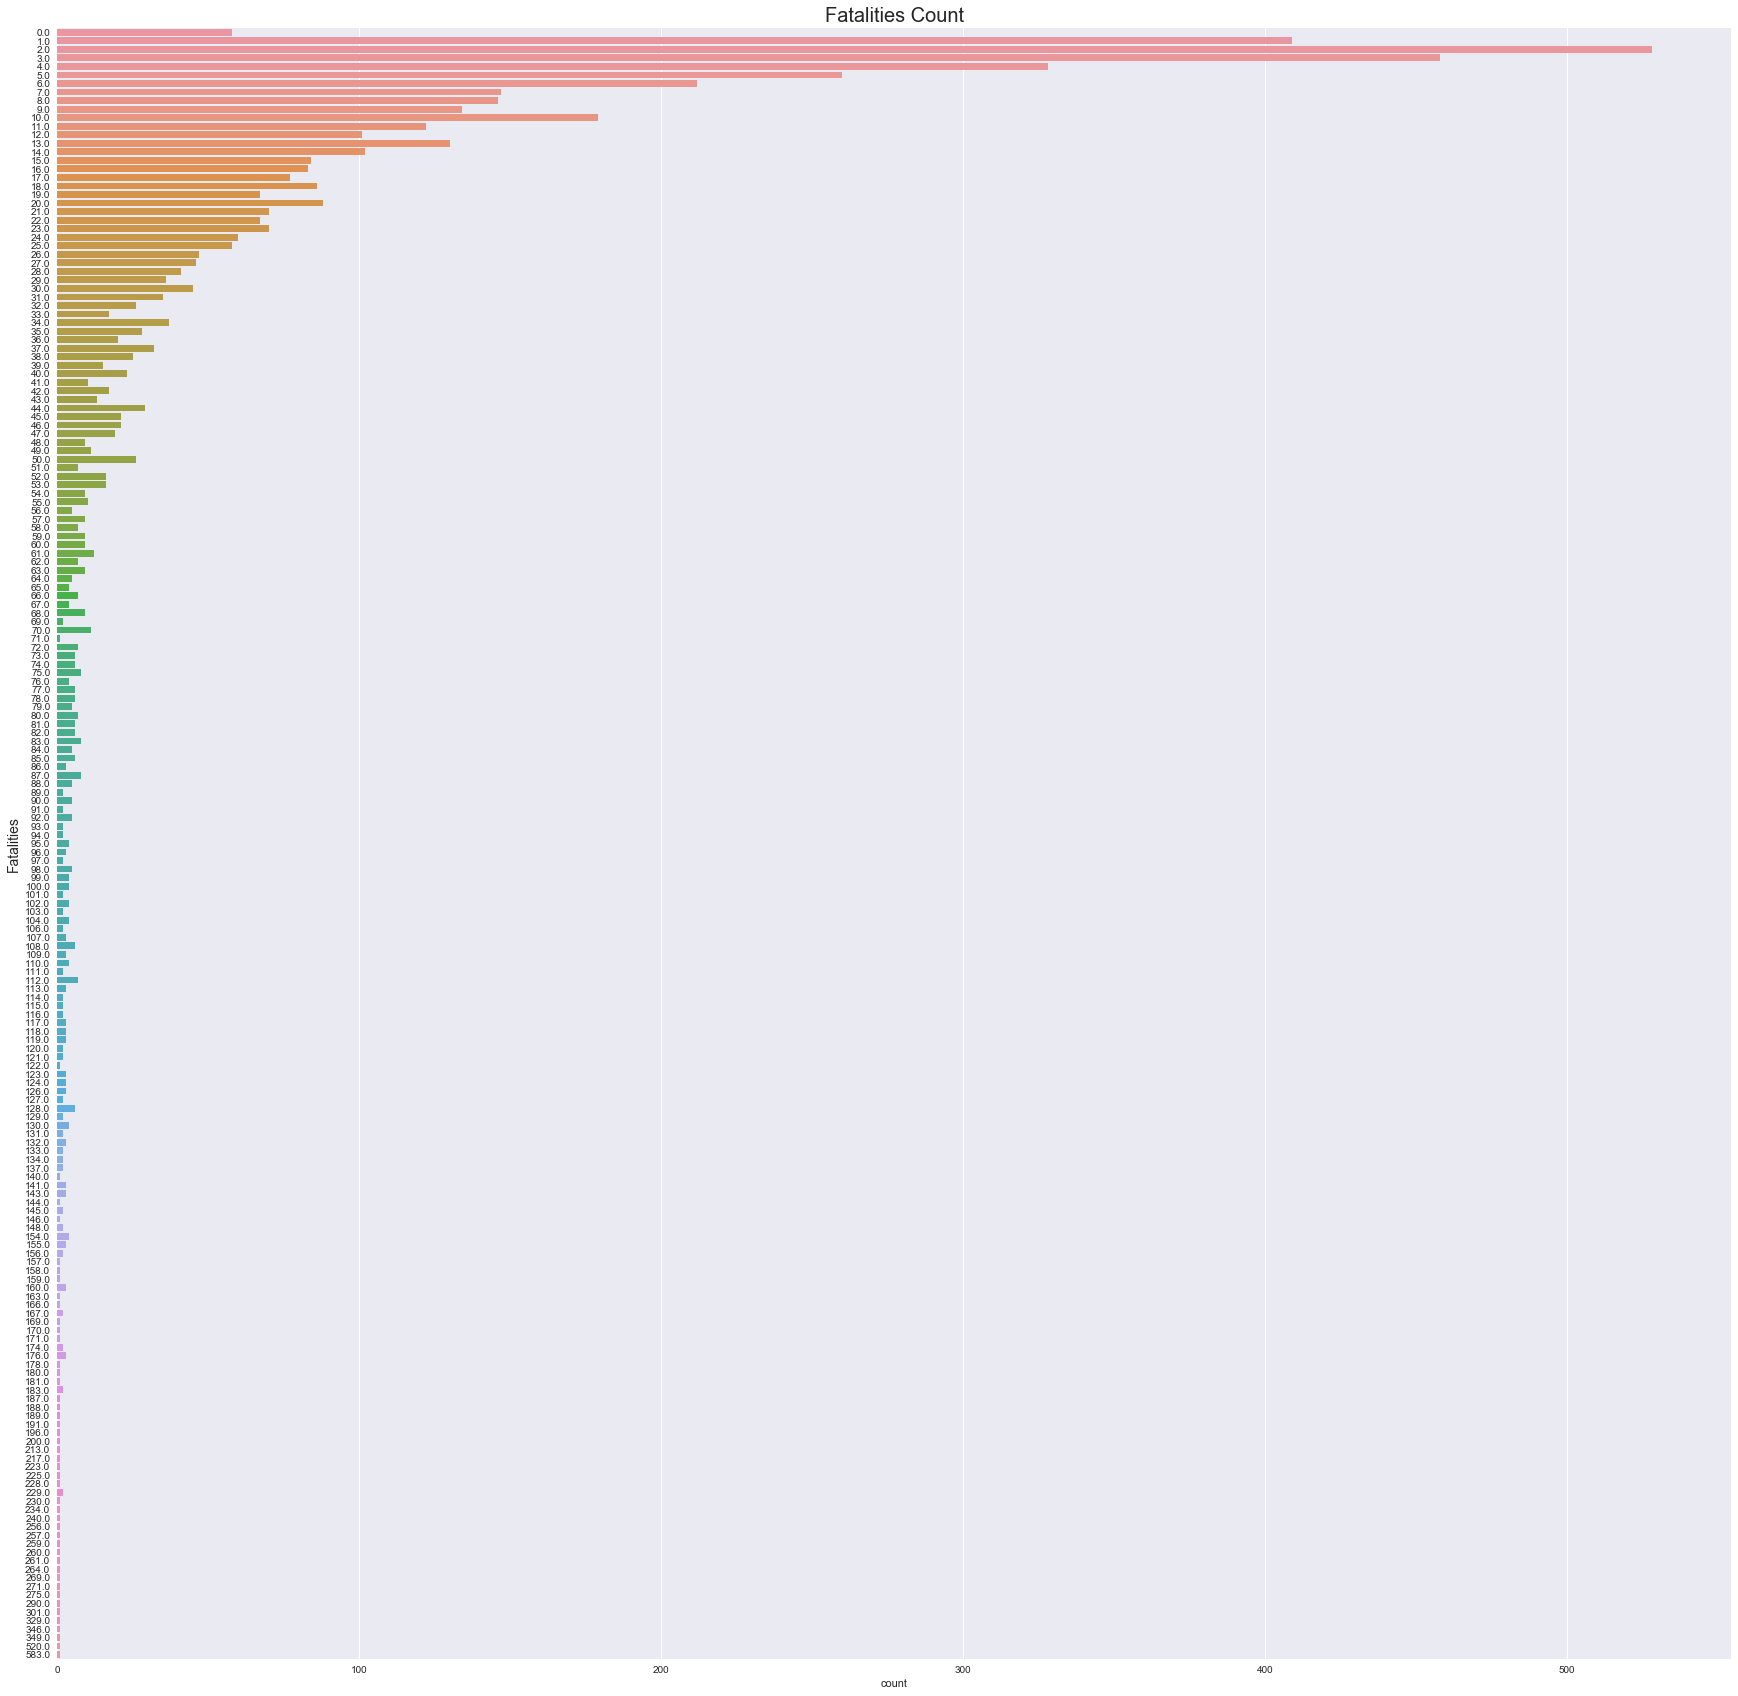

In [15]:
#countplot
plt.figure(figsize=(30, 30))
sns.countplot(y="Fatalities",data=plane_crash)
plt.title('Fatalities Count', fontsize=20)
plt.ylabel('Fatalities', fontsize=14)
plt.show()

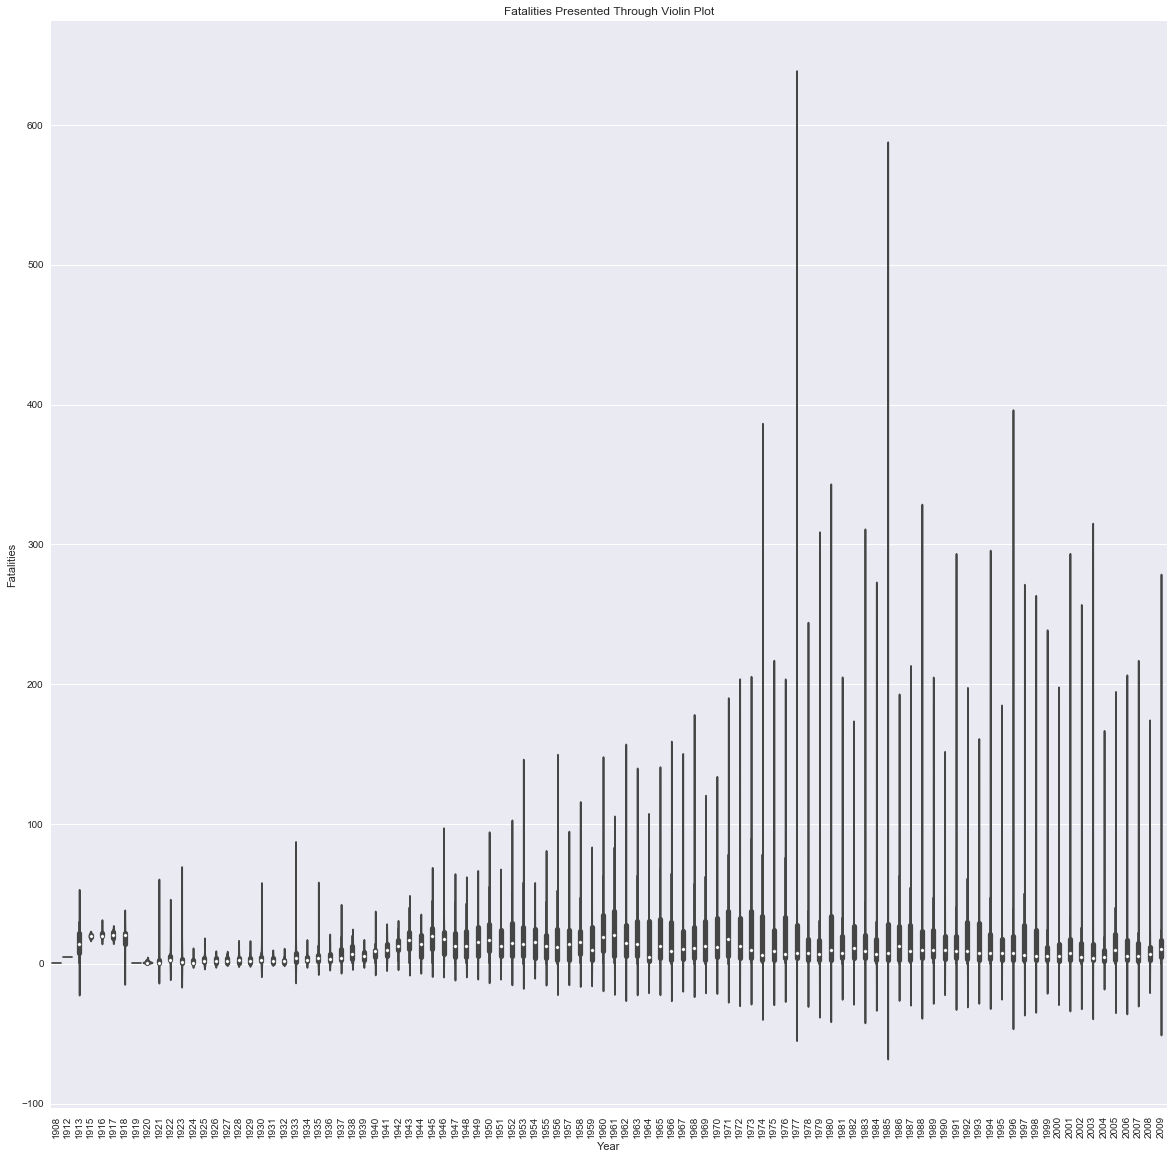

In [16]:
#violin plot
plt.figure(figsize=(20, 20))
sns.set_style("darkgrid")
sns.violinplot(data=plane_crash, x='Year', y ='Fatalities')
plt.title('Fatalities Presented Through Violin Plot')
plt.xticks(rotation=90)
plt.show()

<Figure size 1440x1440 with 0 Axes>

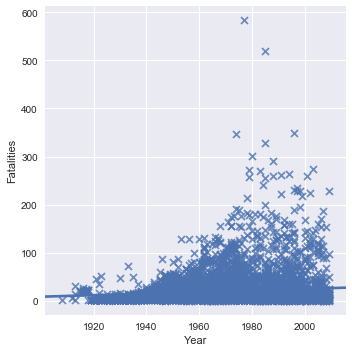

In [17]:
#lmplot
plt.figure(figsize=(20, 20))
sns.lmplot(x='Year',y='Fatalities',data=plane_crash,markers=['x'])
plt.show()

Text(0,0.5,'Fatalities')

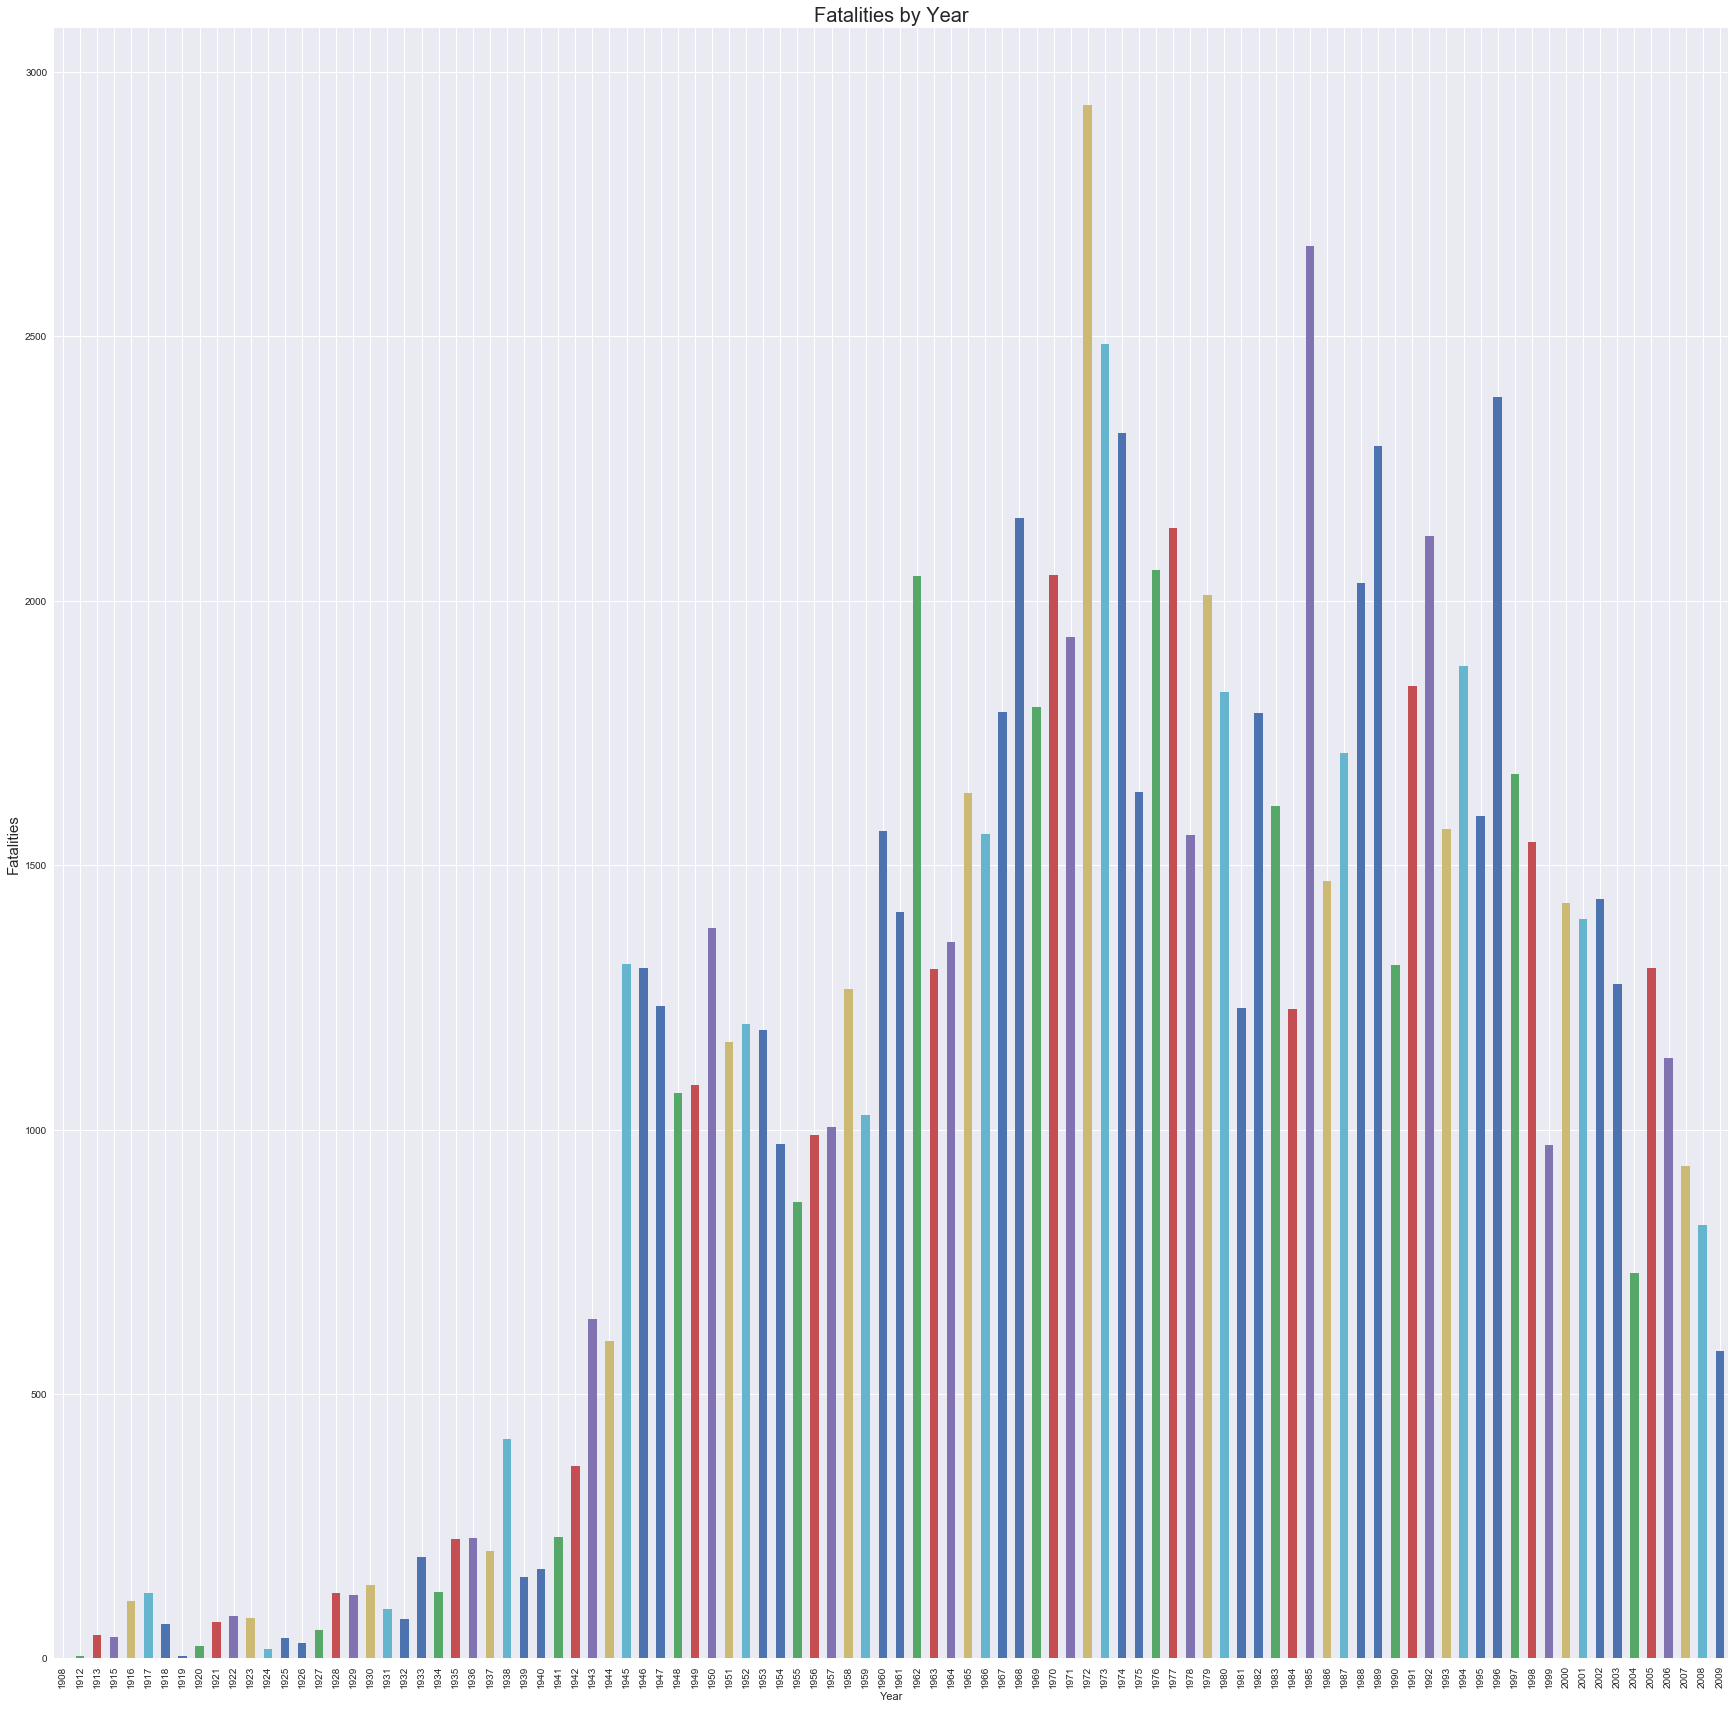

In [18]:
#barplot
plt.figure(figsize=(30, 30))
yearly['Fatalities','sum'].plot(kind='bar',title='Fatalities by Year',grid=True)
plt.title('Fatalities by Year', fontsize=20)
plt.ylabel('Fatalities', fontsize=15)